In [26]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

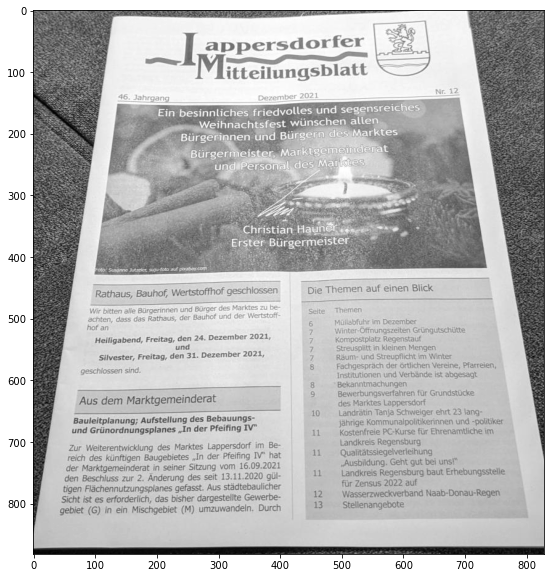

In [27]:
img = cv2.imread('papir.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

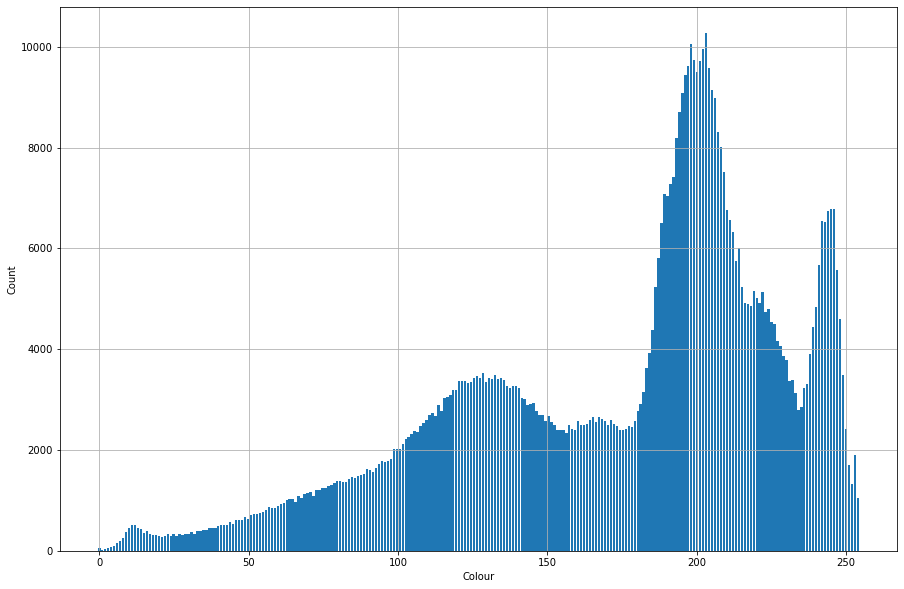

In [28]:
h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)

In [29]:
np.sum(h[0])

731178

In [30]:
# Get image dimensions
rows, cols = img.shape
# Compute the total amount of image pixels
num_pixels = rows * cols
print(num_pixels)

731178


In [43]:
# Get image dimensions
rows, cols = img.shape
# Compute the total amount of image pixels
num_pixels = rows * cols

# Initializations
best_wcv = 1e6  # Best within-class variance (wcv)
opt_th = None   # Threshold corresponding to the best wcv

# Brute force search using all possible thresholds (levels of gray)
for th in range(0, 256):
    # Extract the image pixels corresponding to the foreground
    foreground = h[0][0:th]
    # Extract the image pixels corresponding to the background
    background = h[0][th+1:256]
    
    # If foreground or background are empty, continue
    if len(foreground) == 0 or len(background) == 0:
        continue
    
    # Compute class-weights (omega parameters) for foreground and background
    omega_f = np.sum(foreground)/num_pixels 
    omega_b = np.sum(background)/num_pixels 
    
    # Compute pixel variance for foreground and background
    # Hint: Check out the var function from numpy ;-)
    # https://numpy.org/doc/stable/reference/generated/numpy.var.html
    sigma2_f = np.var(foreground)#/np.sum(h[0][0:th])
    sigma2_b = np.var(background)#/np.sum(h[0][th+1:256])
    
    # Compute the within-class variance
    wcv = (omega_f * sigma2_f + omega_b * sigma2_b)**(0.5)
    
    # Perform the optimization
    if wcv < best_wcv:
        best_wcv = wcv
        opt_th = th
        
# Print out the optimal threshold found by Otsu algorithm
print('Optimal threshold', opt_th)


Optimal threshold 185


In [47]:
print(best_wcv)

1912.3307385166584


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fcd0c19e970>)

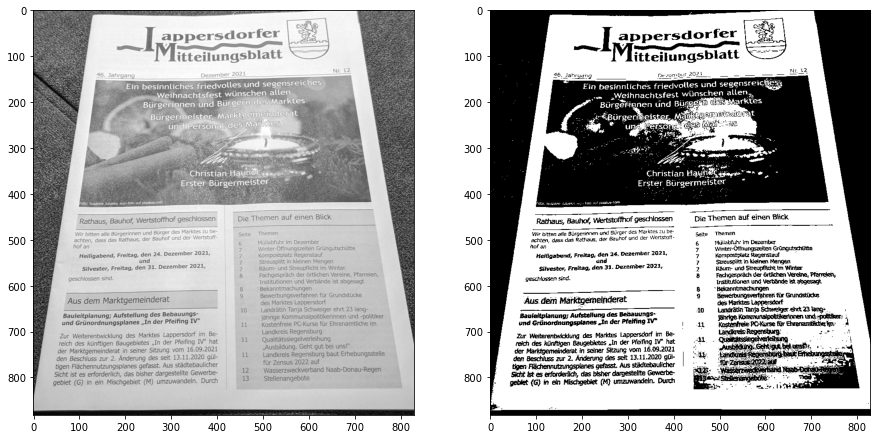

In [48]:

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img > opt_th, cmap='gray')